In [3]:
import matplotlib
%matplotlib inline
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sys
sys.path.append('./training/')
sys.path.append('../')
from config_training import config 
sys.path.append('./preprocessing/')
from step1 import *
from full_prep import lumTrans
from layers import nms,iou

/home/local/VANDERBILT/gaor2/anaconda3/lib/python3.6/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)
/home/local/VANDERBILT/gaor2/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [16]:
img = np.load('./prep_newMCL/363532318_clean.npy')
pbb = np.load('./bbox_result/fe26fd2bb25112b3c2ca93eb8e34f8ed_pbb.npy')
print (img.shape, pbb.shape)

(1, 293, 212, 296) (8, 5)


In [17]:
pbb = pbb[pbb[:,0]>-1]

In [18]:
pbb = nms(pbb,0.05)
box = pbb[0].astype('int')[1:]

In [19]:
box

array([285, 132, 113,   9])

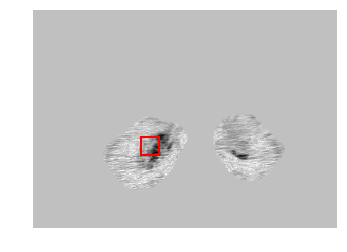

In [20]:
ax = plt.subplot(1,1,1)
plt.imshow(img[0,box[0]],'gray')
plt.axis('off')
rect = patches.Rectangle((box[2]-box[3],box[1]-box[3]),box[3]*2,box[3]*2,linewidth=2,edgecolor='red',facecolor='none')
ax.add_patch(rect)
